In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical


In [2]:
dataset_train = pd.read_csv('Dataset/google_stock_price/Google_Stock_Price_Train.csv') # change the path
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
num_classes = X_train.shape[1]
y_train = to_categorical(y_train, num_classes)

In [7]:

from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(units=64))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
def build_model(x_train, y_train, optimizer, model):
    print("Optimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=5)
    return model, history

In [9]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
adam_model, adam_rnn_history = build_model(X_train, y_train, Adam(), model)
rmsprop_model, rmsprop_rnn_history = build_model(X_train, y_train, RMSprop(), model)
adagrad_model, adagrad_rnn_history = build_model(X_train, y_train, 
                                                     Adagrad(), model)
sgd_model, sgd_rnn_history = build_model(X_train, y_train, 
                                             SGD(), model)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x0000019EADD238C0>
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.0161 - loss: 4.4783
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.0799 - loss: 3.9229
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.3159 - loss: 3.3597
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.6144 - loss: 2.6671
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.8913 - loss: 1.7040
Optimizer:  <keras.src.optimizers.rmsprop.RMSprop object at 0x0000019EBDB234D0>
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.9566 - loss: 0.8050
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.9939 - loss: 0.3354
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9989 - loss: 0.1632
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9976 - loss: 0.0586
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9998 - loss: 

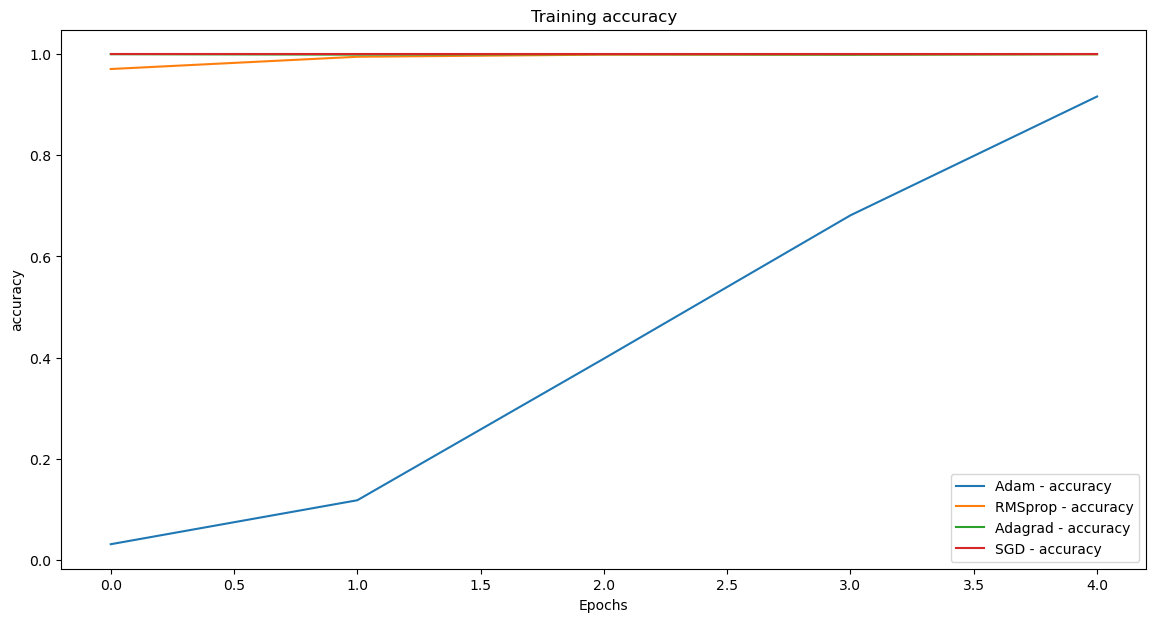

In [10]:
# Function to plot training loss
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


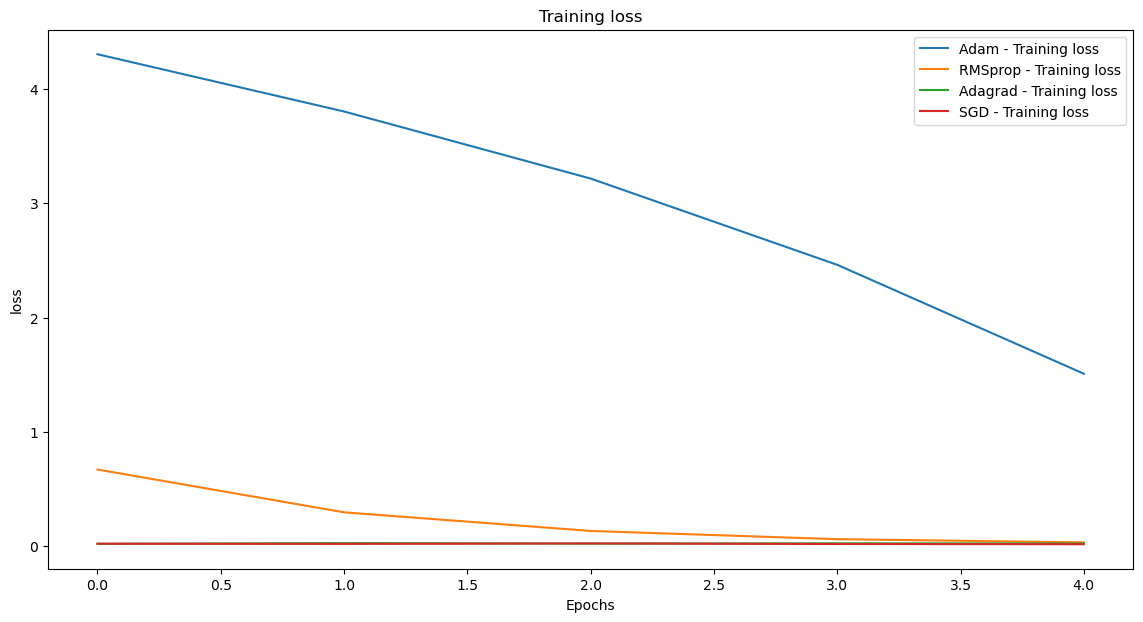

In [11]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])